## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# pd.concat([df1, df4.reindex(df1.index)], axis=1)

#mouse_data_df = pd.concat([mouse_metadata, study_results.reindex(mouse_metadata.index)], axis=1)
#mouse_data_df

#frames = [mouse_metadata, study_results]
# result_df = pd.concat(frames)
merge_result_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merge_result_df

# objs = (mouse_metadata, study_results)

# merge_frames_df = pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
#           levels=None, names=None, verify_integrity=False, copy=True)
# merge_frames_df

# #dup_drop = merge_frames_df
# mouse_metadata['Mouse ID']=='s185'

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
merge_result_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [6]:
# Checking the number of mice in the DataFrame.
combi_total_mice = merge_result_df["Mouse ID"].count()
combi_total_mice

#Unique Mouse ID = 249
# combi_total_mice.nunique()

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseDF = merge_result_df[merge_result_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateMouseDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseDF.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,5.0,5.0,5.000000,5.000000,5.000000
mean,21.0,26.0,10.000000,50.110118,0.200000
std,0.0,0.0,7.905694,4.012413,0.447214
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,47.570392,0.000000
50%,21.0,26.0,10.000000,49.880528,0.000000
75%,21.0,26.0,15.000000,53.442020,0.000000
max,21.0,26.0,20.000000,54.657650,1.000000


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_result_df.drop_duplicates(subset='Mouse ID', keep="last")
clean_mouse_df['Mouse ID'].count()
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = clean_mouse_df["Mouse ID"].count()
cleaned_mouse_count

249

In [11]:
drug_Regimen = clean_mouse_df.groupby("Drug Regimen")
#first item in group
drug_Regimen.first()
#group of items
drug_Regimen.get_group("Ramicane")

,Age_months,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
9,21,1,k403,Male,45,22.050126,16
49,11,1,g791,Male,45,29.128472,16
59,1,0,s508,Male,45,30.276232,17
74,18,1,m546,Male,45,30.564625,16
84,11,0,z578,Male,45,30.638696,16
94,4,1,j913,Female,45,31.560470,17
114,4,1,n364,Male,45,31.095335,17
154,9,1,c758,Male,45,33.397653,17
174,7,1,a644,Female,45,32.978522,17
184,10,3,i177,Male,45,33.562402,18


In [12]:
# volume_mouse_df = clean_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
# volume_mouse_df
group_mean_volume = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
group_mean_volume

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# data.groupby('month')['date'].count()
volume_mouse_df = clean_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
volume_mouse_df
group_mean_volume = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
print(group_mean_volume)
group_median_volume = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
group_median_volume
group_var_volume = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
group_var_volume
group_stdev_volume = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
group_stdev_volume
group_sem_volume = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
print(group_sem_volume)

# summary_stats_df = mean, median, variance, standard deviation, and SEM

df2 = clean_mouse_df.groupby(['Drug Regimen'], as_index=True).agg({'Tumor Volume (mm3)':['mean'],
                                                                   'Tumor Volume (mm3)':['std'],
                                                                   'Tumor Volume (mm3)':['var'],
                                                                  'Tumor Volume (mm3)':['sem']})
df2

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.665521
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64


,Tumor Volume (mm3)
,sem
Drug Regimen,
Capomulin,1.143038
Ceftamin,1.673114
Infubinol,1.720591
Ketapril,1.989184
Naftisol,2.059417
Placebo,1.774934
Propriva,1.665521
Ramicane,1.134308


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# summary_stats_df = mean, median, variance, standard deviation, and SEM
summary_stats_df = pd.DataFrame({"Mean": group_mean_volume,
"Median": group_median_volume,
"Variance": group_var_volume,
"SD": group_stdev_volume,
"SEM": group_sem_volume})

summary_stats_df

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

10


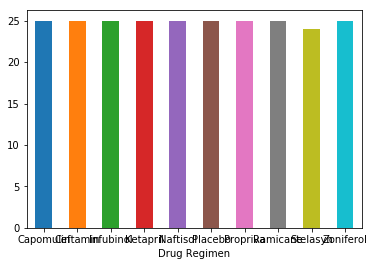

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# x-axis =treatment y_axis=number of mice
time_points_df = clean_mouse_df.loc[:,['Drug Regimen','Timepoint']]
group_time_points_df = time_points_df.groupby('Drug Regimen').count()['Timepoint']
group_time_points_df
group_regimens_df = time_points_df.groupby('Drug Regimen')
group_regimens_df

print(len(group_time_points_df))
# Create a bar chart based upon the above data
#plt.bar(len(group_time_points_df), group_regimens_df, color="b", align="center")

ax = group_time_points_df.plot.bar(rot=0)


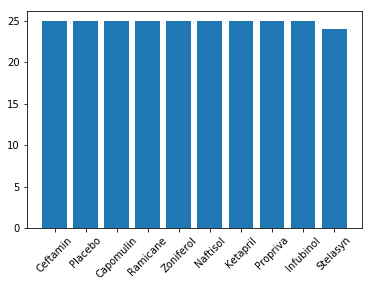

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# x_axis = treatment/timeplot y-axis= number of mice
volume_mouse_df = clean_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]

result = clean_mouse_df.loc[:,['Drug Regimen']]
result
Drug_regimen = result.groupby(['Drug Regimen'])
regimen_count= len(Drug_regimen)



x_axis= clean_mouse_df['Drug Regimen'].value_counts().index
y_axis= clean_mouse_df['Drug Regimen'].value_counts()

#group_time_points_df.plot(kind='bar', x='Drug Regimen', y='group_time_points_df')

plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.show()

## Pie Plots

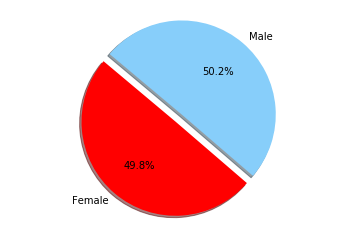

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male_df = clean_mouse_df.loc[:,['Sex','Timepoint']]
groupfemale_male_df = female_male_df.groupby('Sex').count()
labels = ["Female", "Male"]
#labels
colors = ["red", "lightskyblue"]
explode = (0.1, 0)

#plt.pie(groupfemale_male_df, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

plt.pie(groupfemale_male_df, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()


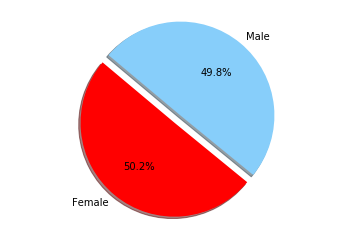

In [34]:

mouse_df = female_male_df['Sex'].value_counts(normalize = True)
#print(a)

colors = ["red", "lightskyblue"]
labels = ["Female", "Male"]
explode = (0.1, 0)
plt.pie(mouse_df, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
placebo_qtr_tumor_df= placebo_qtr_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# placebo_qtr_tumor_df.head()

quartiles = placebo_qtr_tumor_df.quantile([0.25,0.5,0.75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq-lowerq
medianq = placebo_qtr_df['Tumor Volume (mm3)'].median()

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {medianq} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of temperatures is: 52.94290169
The upper quartile of temperatures is: 68.13428817
The interquartile range of temperatures is: 15.191386480000006
The the median of temperatures is: 62.03059364 
Values below 30.15582196999999 could be outliers.
Values above 90.92136789000001 could be outliers.


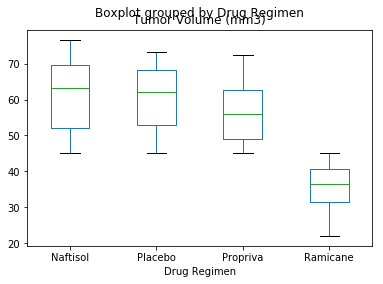

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# school_data_complete.loc[school_data_complete['Drug Regimen']=="Ramicane"]
# select 4 regimens

box_plot_regime = clean_mouse_df[(clean_mouse_df['Drug Regimen']=="Placebo") | (clean_mouse_df['Drug Regimen']=="Ramicane") | (clean_mouse_df['Drug Regimen']=="Naftisol") | (clean_mouse_df['Drug Regimen']=="Propriva")]
# print(box_plot_regime)

box_plot_regime.boxplot(by="Drug Regimen", column=['Tumor Volume (mm3)'], grid = False)


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_mouse_df = clean_mouse_df[(clean_mouse_df['Mouse ID']=="l509")]
print(Capomulin_mouse_df)
# Capomulin_mouse_df = Capomulin_df.loc[(Capomulin_df['Mouse ID']=="k403")]
Capomulin_df = Capomulin_mouse_df.loc[(Capomulin_mouse_df['Drug Regimen']=="Capomulin")]
Capomulin_df.head()


Capomulin_vol_df = Capomulin_mouse_df.loc[: ,['Tumor Volume (mm3)','Timepoint']]
print(Capomulin_vol_df)

# #years = average_unemployment.keys()

study_l509_df = study_results[(study_results['Mouse ID']=="l509")]

study_l509_df_plt = study_l509_df.loc[: ,['Tumor Volume (mm3)','Timepoint']]
print(study_l509_df_plt)

#lines_plot = study_l509_df_plt.plot.line()

plt.plot(study_l509_df_plt['Timepoint'], study_l509_df_plt['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capoulin Treatment of Mouse l509')
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen']=="Capomulin"]
Capomulin_df
Capomulin_vol_df = Capomulin_df.loc[: ,['Weight (g)','Tumor Volume (mm3)']]

ave_tumer_vol = Capomulin_df['Tumor Volume (mm3)'].mean()
print(ave_tumer_vol)

print(Capomulin_vol_df)
Capomulin_vol_df.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_vol_df.corr(method ='pearson') 

data1 = Capomulin_vol_df['Weight (g)']
data2 = Capomulin_vol_df['Tumor Volume (mm3)']

#corr, _ = Capomulin_vol_df['Weight (g)', 'Tumor Volume (mm3)']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
#linear regression model
X = Capomulin_vol_df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = Capomulin_vol_df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capoulin Treatment of Mouse l509')
plt.show()

In [ ]:
''''servations
1) Based on pie chart results, the distribution of female versus male mice is just split in half 
2) The regiment Naftisol has the highest variance and standard diviation in results  
3) There ios a high correlation between mouse weight and average tumor volume for mouse on the Capomulin regimen 
4) Capoulin treatment for tumor volume reduction takes effect after usage over a period of time (20 days) in this instance for mouse l509; effects are not immediate.